## Evaluation

### NER

In [ ]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Folder containing the pickle files
folder_path = "../logs/ner"

# List to store data
data = []

# Iterate over each file in the folder
for file in os.listdir(folder_path):
    if file.endswith(".pkl"):
        model_name, _, hidden_size = file.rsplit("_", 2)
        hidden_size = int(hidden_size.split(".")[0])  # Extract the hidden size

        # Load the pickle file
        with open(os.path.join(folder_path, file), "rb") as f:
            lst = pickle.load(f)

        # Get the last element of the list
        last_element = lst[-1] if lst else None

        # Append to data
        data.append([model_name, hidden_size, last_element])

# Create DataFrame
ner_df = pd.DataFrame(data, columns=["Model Name", "Hidden Size", "Last Element"])
ner_pivot_df = ner_df.pivot(index="Model Name", columns="Hidden Size", values="Last Element")

# Sorting columns for better readability
ner_pivot_df = ner_pivot_df.sort_index(axis=1, ascending=True)
ner_pivot_df = ner_pivot_df.dropna(how='any')  # Remove rows with all NaN values

# Display the result
ner_pivot_df.sort_values(by=8, ascending=False)

Hidden Size,1,2,4,8,16,32,64
Model Name,,,,,,,
elmo,0.995448,0.996041,0.997233,0.997665,0.998056,0.998203,0.998305
roberta_x2,0.995159,0.996789,0.996977,0.997659,0.997931,0.998140,0.998187
hubert_x2,0.995127,0.995912,0.997024,0.997545,0.997883,0.998151,0.998242
hubert_de,0.992286,0.996482,0.997004,0.997322,0.997724,0.997921,0.998025
huspacy,0.995173,0.995437,0.996693,0.997204,0.997525,0.997753,0.997731
efnilex,0.994544,0.995542,0.996200,0.997045,0.997379,0.997508,0.997570
fasttext,0.995487,0.995586,0.996051,0.996909,0.997324,0.997539,0.997586
hubert_agg,0.995579,0.995312,0.996370,0.996781,0.997409,0.997632,0.997723
roberta_de,0.990027,0.990369,0.995249,0.995608,0.995595,0.996046,0.996246


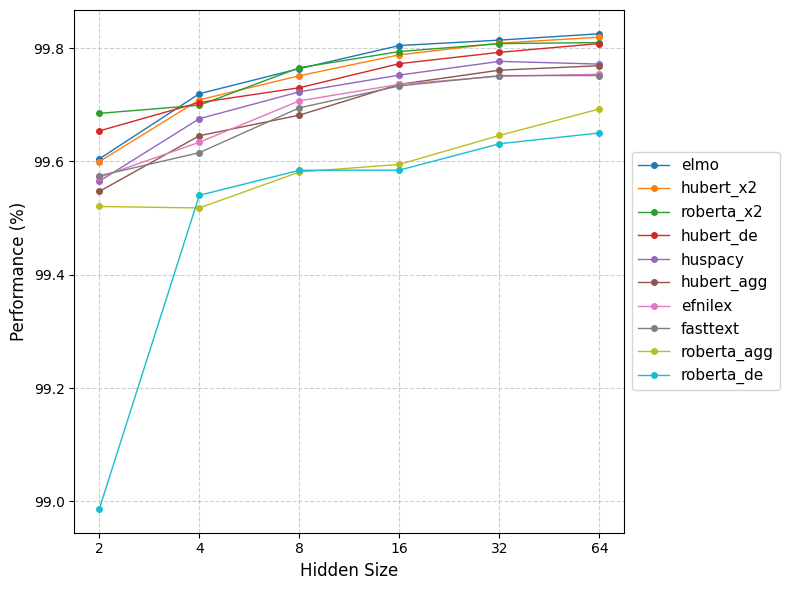

In [ ]:
def plot_model_performance(df):
    """
    Plots model performance across different hidden sizes using a given DataFrame.

    Args:
        df (pd.DataFrame): A DataFrame where index represents model names, columns represent hidden sizes,
                           and values represent performance scores.
    """
    plt.figure(figsize=(8, 6))

    # Plot each model's performance
    for model in df.index:

        plt.plot([str(item) for item in list(df.columns)], df.loc[model], marker='o', linestyle='-', label=model, linewidth=1, markersize=4)

    # Labels and title
    #plt.style.use('grayscale')
    plt.xlabel("Hidden Size", fontsize=12)
    plt.ylabel("Performance (%)", fontsize=12)
    #plt.title("Model Performance Across Hidden Sizes")
    plt.xticks([str(item) for item in list(ner_pivot_df.columns)])
    plt.legend(loc='center left', fontsize=11, bbox_to_anchor=(1, 0.5))
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    plt.savefig('ner_test.pdf')

    plt.show()

plot_model_performance(ner_pivot_df)

### POS

In [ ]:
# Folder containing the pickle files
folder_path = "../logs/pos/test"

# List to store data
data = []

# Iterate over each file in the folder
for file in os.listdir(folder_path):
    if file.endswith(".pkl"):
        model_name, _, hidden_size = file.rsplit("_", 2)
        hidden_size = int(hidden_size.split(".")[0])  # Extract the hidden size

        # Load the pickle file
        with open(os.path.join(folder_path, file), "rb") as f:
            lst = pickle.load(f)

        # Get the last element of the list
        last_element = lst * 100 #[-1] if lst else None

        # Append to data
        data.append([model_name, hidden_size, last_element])

# Create DataFrame
pos_df = pd.DataFrame(data, columns=["Model Name", "Hidden Size", "Last Element"])
pos_df = pos_df[pos_df['Hidden Size'] != 1]

pos_pivot_df = pos_df.pivot(index="Model Name", columns="Hidden Size", values="Last Element")

# Sorting columns for better readability
pos_pivot_df = pos_pivot_df.sort_index(axis=1, ascending=True)

# Display the result
pos_pivot_df = pos_pivot_df.sort_values(by=64, ascending=False)
pos_pivot_df

Hidden Size,2,4,8,16,32,64
Model Name,,,,,,
elmo,98.645163,99.284428,99.399966,99.517614,99.581087,99.616230
hubert_x2,98.108429,99.135298,99.298728,99.461609,99.536097,99.576241
roberta_x2,98.591554,99.107283,99.341536,99.452686,99.528372,99.565095
hubert_de,98.074234,99.043125,99.214083,99.385208,99.466479,99.516767
huspacy,97.977239,98.900616,99.224997,99.372250,99.455357,99.514306
efnilex,97.928798,98.886061,99.085391,99.222660,99.265581,99.311489
fasttext,97.804451,98.574156,99.019957,99.163824,99.249089,99.301046
hubert_agg,96.910739,97.374946,98.127723,98.572075,98.852682,99.021649
roberta_de,95.704693,96.766144,97.449172,97.782046,97.718871,97.892076


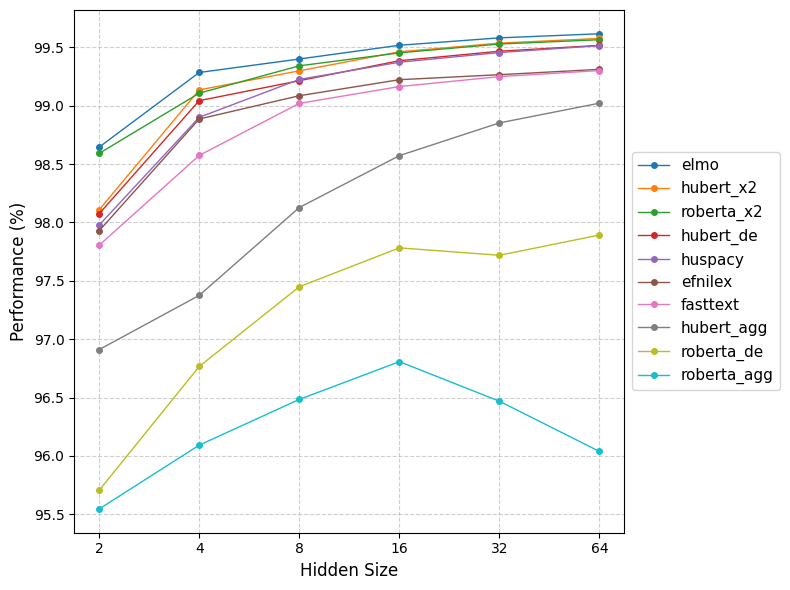

In [ ]:
import matplotlib.pyplot as plt

def plot_model_performance(df):
    """
    Plots model performance across different hidden sizes using a given DataFrame.

    Args:
        df (pd.DataFrame): A DataFrame where index represents model names, columns represent hidden sizes,
                           and values represent performance scores.
    """
    plt.figure(figsize=(8, 6))

    # Plot each model's performance
    for model in df.index:

        plt.plot([str(item) for item in list(df.columns)], df.loc[model], marker='o', linestyle='-', label=model, linewidth=1, markersize=4)

    # Labels and title
    plt.xlabel("Hidden Size", fontsize=12)
    plt.ylabel("Performance (%)", fontsize=12)
    #plt.title("Model Performance Across Hidden Sizes")
    plt.xticks([str(item) for item in list(df.columns)])
    plt.legend(loc='center left', fontsize=11, bbox_to_anchor=(1, 0.5))
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig('pos_test.pdf')

    plt.show()

plot_model_performance(pos_pivot_df)